# Neural Network for Music Exploration (NeuroNMusE)

## Overview

Meet **NeuroNMusE**: a compact and efficient Neural Network for Music Exploration, specifically designed to generate the next 10 seconds of an audio track based on its initial 10 seconds — all while operating with minimal computational resources.

Are you a musician seeking inspiration or struggling to compose your next masterpiece? Let NeuroNMusE be your creative muse. Simply play any segment of your melody—even an unfinished or imperfect one—and let the network suggest alternative rhythms and melodies to spark your creativity.

NeuroNMusE is built on three core components, making it both intuitive and powerful for music generation and exploration.

1. **Encoder**: Encodes the input waveformat files (numpy analog of an audio file, see **Data Preprocessing**) into a compact representation using convolutional and max-pooling layers.
2. **Transformer**: Processes the encoded representation using multi-head attention layers to capture temporal patterns in the audio signal and model temporal dependencies.
3. **Decoder**: Decodes the processed representation back into waveformat files. Thes outputs are converted back into .mp3 files.

The model has two outputs:
- **Output 1**: The original input audio, passed through the encoder and decoder, is reconstructed. This ensures the network's ability to encode and decode the signal effectively without losing important features.
- **Output 2**: The encoded signal is passed through the transformer and then decoded into the predicted continuation of the audio track.

## Requirements

1. **A computer** with Python installed and the necessary audio processing packages. (See dependencies below.) While a GPU is preferable, NeuroNMusE can be trained on a standard laptop CPU for moderate-quality music.
2. **Music tracks** in `.mp3` format. You can use songs from your own playlist.
3. **A passion for musical discovery**—the most essential requirement!

---

## Example Output (Low Computational Power)

Worried about limited computational resources? NeuroNMusE excels even on modest hardware. You can train the model and generate reasonably good-sounding melodies on a typical laptop.

Below is an example: the network generates a 10-second audio continuation from the first 10 seconds of "Bablo Pobezhdaet Zlo" by the band Yndervud. This was produced after training NeuroNMusE on my MacBook with telephonic-quality (12,000 Hz) audio. Despite the input's low fidelity, the network effectively captures rhythmic patterns and reproduces drum and bass guitar sections.


&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 🎵 **[Download the .mp3 input](
https://github.com/Vlasenko2006/RockNet/blob/main/input_epoch_120.mp3)** 🎵

&nbsp;


&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 🎵 **[Download the .mp3 output](https://github.com/Vlasenko2006/Lets_Rock/blob/main/output_example.mp3)** 🎵




### Advantages 

1. The neural network is simple and trainable within several minutes (20 epochs is pretty enough). You can run it on CPU, even on your laptop
2. The neural network correctly captures the mood and style of the song distinguishing reggae, rock, salsa, etc. rythms in the input without explicit specifications.
3. The neural network creates its own rythmic and instrumental pattern in the output which is similar but not the same as in the corresponding target (original continuation of the input.)
4. Wave format music representation results in memory efficiency.
---

### Caviats

1. Price for efficency in memory usage (Advantage No. 4) is the output quality. 
2. The NN creates a melody in a bass section with drums and bass guitar only (even if the original track has none of these instruments), failing to reproduce complex instruments, guitar riffs, and vocals.
3. Complete failure in reproducing middle-high frequencies - giving a constant telephone-like tone on the background.
4. The NN was trained on low-quality (telephonic quality) audio files. Low-quality inputs result in low-quality outputs.


### Computationally Efficient Data Preprocessing

Before training, all audio data undergoes a streamlined preprocessing step. Each original `.mp3` file is converted into a **waveform format**—a sequence of amplitude values representing the sound wave over time. This transformation allows the model to process and learn from numerical data, making neural network training feasible even on hardware with limited computational resources.

The waveform format captures:
- The **loudness** (amplitude) of the audio signal at each time step.
- Temporal patterns essential for modeling rhythms, beats, and melodies.

Below is a plot of a converted `.mp3` audio file in waveform format (orange curve) and the predicted one by the NN (violet). The x-axis represents time (microseconds), and the y-axis represents the amplitude of the signal.


File 'waveformat.png' exists.


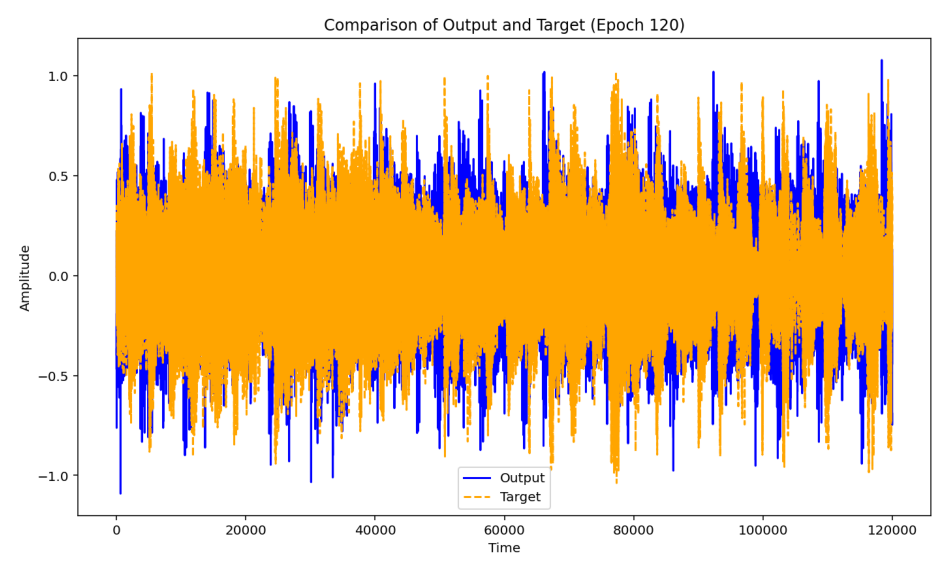

In [14]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os


file_path = "waveformat.png"
assert os.path.exists(file_path), f"You forgot to copy  '{file_path}' from the archive! Copy it from archive folder and rerun the cell"
print(f"File '{file_path}' exists.")

img = mpimg.imread(file_path)
plt.figure(figsize=(12, 8))

plt.imshow(img)
plt.axis('off')  # Hide axes

# Show the figure
plt.show()




---

### Wave Format or (Mel)Spectrogram?

Indeed, spectrogrgrams give a 2D representation of audio signal and they better picture its pecularities than 1D Wave format. Still, extra dimention gives you extra memory costs and complicates the problem of music reproduction (dimension curse).   

### Training Process

1. **Data Preprocessing**:
   - Audio tracks are converted into **NumPy arrays**.
   - Each waveform is split into 10-second chunks.
   - Pairs are formed where the first chunk serves as the input, and the second chunk serves as the target.

2. **Cost Function**:
   - The cost function consists of two components:
     - **Reconstruction Loss**: Compares the input audio with the reconstructed audio from the encoder-decoder.
     - **Prediction Loss**: Measures the difference between the predicted continuation and the target continuation using Mean Squared Error (MSE).

3. **Training**:
   - The model is trained in two stages:
     - In the first epochs, the encoder and decoder are trained together to minimize the reconstruction loss.
     - Next, the transformer is added, and the full network is trained to predict the continuation of audio tracks.

---

### Installation Instructions

To set up the necessary environment, follow these steps:

1. Install Python 3.9 or higher.
2. Clone the repository and navigate to its directory:
   ```bash
   git clone https://github.com/your-repo/audio-prediction-model.git
   cd audio-prediction-model
   ```
3. Install the required dependencies using either `pip` or `conda`:
   - Using `pip`:
     ```bash
     pip install -r requirements.txt
     ```
   - Using `conda`:
     ```bash
     conda env create -f environment.yml
     conda activate audio-prediction
     ```
4. Ensure `ffmpeg` is installed and available in your system's PATH. You can install it via a package manager:
   - On Ubuntu: 
     ```bash
     sudo apt update
     sudo apt install ffmpeg
     ```
   - On macOS:
     ```bash
     brew install ffmpeg
     ```
   - On Windows: Download the binaries from [FFmpeg's official website](https://ffmpeg.org/) and configure your PATH.

---

### Example Usage

To preprocess audio files, create a dataset, and train the model, use the following commands:

1. **Preprocess Audio Files**:
   ```bash
   python preprocess.py --input_folder /path/to/audio --output_folder /path/to/output
   ```
2. **Create Dataset**:
   ```bash
   python create_dataset.py --output_folder /path/to/output --dataset_folder /path/to/dataset
   ```
3. **Train the Model**:
   ```bash
   python train.py --dataset_folder /path/to/dataset --checkpoint_folder /path/to/checkpoints
   ```

---

### Limitations and Future Improvements

- **Computational Constraints**: The current setup is optimized for a single GPU with 15GB of RAM. Expanding the model's capacity (e.g., more layers and transformer heads) would improve its ability to capture complex musical structures like vocals and rhythm guitars.
- **Dataset Size**: A larger and more diverse dataset would significantly enhance the model's generalization and output quality.

---

### Requirements Files

To run the code you need to install the AI python libraries using either `pip` or `conda` installer. Find list of these libraries listed below as `requirements.txt` and `environment.yml` Python environment. Create the either `requirements.txt` or `environment.yml` and copy-paste the corresponding content:

#### `requirements.txt` (is `pip`)

```
librosa==0.10.0.post2
numpy==1.23.5
scipy==1.10.1
torch==2.0.1
soundfile==0.12.1
pydub==0.25.1
tqdm==4.65.0
```

#### `environment.yml` (For `conda`)

```
name: audio-prediction
channels:
  - defaults
  - conda-forge
dependencies:
  - python=3.9
  - librosa=0.10.0
  - numpy=1.23.5
  - scipy=1.10.1
  - pytorch=2.0.1
  - soundfile=0.12.1
  - pydub=0.25.1
  - tqdm=4.65.0
  - ffmpeg
```

## Installation

### Pip Installation (using virtualenv)

1. **Create a virtual environment:**
   ```bash
   python -m venv audio-prediction
   ```
2. **Activate the virtual environment:**
   ```bash
   source audio-prediction/bin/activate
   ```
3. **Install required packages:**
   ```bash
   pip install -r requirements.txt
   ```

---

### Conda Installation

1. **Create the environment from the `environment.yml` file:**
   ```bash
   conda env create -f environment.yml
   ```
2. **Activate the environment:**
   ```bash
   conda activate audio-prediction
   ```

---

**Notes:**
- For Windows, use `audio-prediction\Scripts\activate` instead of `source audio-prediction/bin/activate`.
- Make sure you have [pip](https://pip.pypa.io/en/stable/installation/) and [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html) installed.
---

### Acknowledgments

This project was created by **Andrey Vlasenko** and is an ongoing experiment in music generation. The work demonstrates the potential of compact neural networks for music composition and prediction under constrained computational resources.

In [2]:

import os
import librosa
import soundfile as sf
from pydub import AudioSegment
import numpy as np
import random
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import DataLoader


###################################################
###############  ATTENTION!!! #####################
###################################################
# The ffmpeg and ffprobe are configured for MAC OS.
# If you use a different platform, you may need to
# use different paths

os.environ["PATH"] += os.pathsep + "/usr/local/bin"
AudioSegment.converter = "/usr/local/bin/ffmpeg"
AudioSegment.ffprobe = "/usr/local/bin/ffprobe"

# Data Pre and Postprocessing

## MP3 to NumPy and Back to MP3: Utility Functions

This module provides two utility functions for converting between MP3 files and NumPy arrays, making it easy to process audio data with Python libraries like `librosa` and `soundfile`.

- **mp3_to_numpy**: Converts MP3 files to NumPy arrays representing music in a waveform. These arrays are the inputs and outputs of NeuroNMuse workflows.

- **numpy_to_mp3**: Converts NumPy arrays, the NumPy-based outputs of NeuroNMuse, back into .mp3 format.

---

### `mp3_to_numpy(mp3_file, target_sr=12000)`

**Description:**  
Loads an MP3 file and converts it to a NumPy array, resampling to a target sample rate if specified.

**Parameters:**
- `mp3_file` (*str*): Path to the input MP3 file.
- `target_sr` (*int*, optional): Target sample rate in Hz (default: 12000).

**Returns:**
- `waveform` (*np.ndarray*): Audio data as a NumPy array (shape: `(channels, samples)` if stereo).
- `sample_rate` (*int*): Sample rate of the loaded audio.

**Example:**
```python
waveform, sr = mp3_to_numpy("song.mp3", target_sr=16000)
```

---

### `numpy_to_mp3(waveform, sample_rate, output_mp3_file="output.mp3")`

**Description:**  
Saves a NumPy array as an MP3 file. The function first writes a temporary WAV file, then converts it to MP3 using `pydub`.

**Parameters:**
- `waveform` (*np.ndarray*): Audio data as a NumPy array (shape: `(channels, samples)` for stereo, transpose if needed).
- `sample_rate` (*int*): Sample rate of the audio data.
- `output_mp3_file` (*str*, optional): Path for the output MP3 file (default: `"output.mp3"`).

**Example:**
```python
numpy_to_mp3(waveform, sample_rate, "processed_song.mp3")
```

**Notes:**
- Requires `librosa`, `soundfile`, `pydub`, and `os` libraries.
- The function creates and deletes a temporary WAV file during conversion.
- Make sure `ffmpeg` is installed and available for `pydub` to convert WAV to MP3.

---

In [15]:

def mp3_to_numpy(mp3_file, target_sr=12000):
    """
    Converts an MP3 file to a NumPy array.
    Parameters:
    - mp3_file: Path to the input MP3 file.
    - target_sr: Target sample rate for the waveform (default = 16 kHz).
    Returns:
    - waveform: NumPy array of audio data.
    - sample_rate: Sample rate of the audio.
    """
    # Load the MP3 file as a waveform
    waveform, sample_rate = librosa.load(mp3_file, sr=target_sr, mono=False)
    print(f"Converted MP3 to NumPy array: {waveform.shape}, Sample Rate: {sample_rate}")
    return waveform, sample_rate

def numpy_to_mp3(waveform, sample_rate, output_mp3_file="output.mp3"):
    """
    Converts a NumPy array back to an MP3 file.
    Parameters:
    - waveform: NumPy array of audio data.
    - sample_rate: Sample rate of the waveform.
    - output_mp3_file: Path to the output MP3 file.
    """

    temp_wav_file = "temp_output.wav"
    sf.write(temp_wav_file, waveform.T, sample_rate)  # Transpose if stereo


    audio = AudioSegment.from_wav(temp_wav_file)
    audio.export(output_mp3_file, format="mp3")
    print(f"Converted NumPy array to MP3: {output_mp3_file}")

    # Remove the temporary .wav file
    os.remove(temp_wav_file)



### 1.1 process_music_files

Walks through your all your music in the `input_folder` and picks up to `max_files` MP3 music files having at least `clip_duration` seconds long, loads and converts the first `clip_duration` seconds to a NumPy array at the specified `target_sr` sample rate, then saves the result in `output_folder` as an `.npy` file. Files shorter than the clip duration are skipped.

**Parameters:**
- `input_folder`: Directory to search for MP3 files (recursively).
- `output_folder`: Directory to save output NumPy arrays.
- `max_files`: Maximum number of files to process.
- `clip_duration`: Seconds of audio to keep from each file.
- `target_sr`: Sample rate for loading audio.

**Skips files** that are shorter than the requested duration.

In [4]:

def process_music_files(input_folder, output_folder, max_files=200, clip_duration=120, target_sr=16000):
    """
    Searches for music files in a folder (including subfolders), processes them into NumPy arrays,
    and saves the first `clip_duration` seconds of audio for each file into the output folder.
    Skips files shorter than `clip_duration` seconds.

    Parameters:
    - input_folder: Folder to search for music files.
    - output_folder: Folder to save processed NumPy arrays.
    - max_files: Maximum number of files to process.
    - clip_duration: Duration (in seconds) of audio to keep.
    - target_sr: Target sample rate for the waveform.
    """
    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Collect all music files (e.g., MP3 format) in the folder and subfolders
    music_files = []
    for root, _, files in os.walk(input_folder):
        for file in files:
            if file.lower().endswith(".mp3"):
                music_files.append(os.path.join(root, file))
                if len(music_files) >= max_files:
                    break
        if len(music_files) >= max_files:
            break

    print(f"Found {len(music_files)} music files to process.")

    # Process each file
    for idx, music_file in enumerate(music_files, start=1):
        try:
            # Convert MP3 to NumPy array
            waveform, sample_rate = mp3_to_numpy(music_file, target_sr=target_sr)
            
            # Calculate the number of samples for the desired clip duration
            num_samples = clip_duration * target_sr

            # Check if the audio is long enough
            if waveform.shape[-1] < num_samples or waveform.ndim < 2:
                print(f"Skipping {music_file}: Less than {clip_duration} seconds.")
                continue

            # Take only the first `clip_duration` seconds
            truncated_waveform = waveform[:, :num_samples] if waveform.ndim == 2 else waveform[:num_samples]
            truncated_waveform = truncated_waveform.astype(np.float16)
            # Save the processed waveform as a NumPy file
            output_file = os.path.join(output_folder, f"{idx}.npy")
            np.save(output_file, truncated_waveform)
            print(f"Processed and saved: {output_file}")

        except Exception as e:
            print(f"Error processing {music_file}: {e}")



In [4]:

def process_music_files(input_folder, output_folder, max_files=200, clip_duration=120, target_sr=16000):
    """
    Searches for music files in a folder (including subfolders), processes them into NumPy arrays,
    and saves the first `clip_duration` seconds of audio for each file into the output folder.
    Skips files shorter than `clip_duration` seconds.

    Parameters:
    - input_folder: Folder to search for music files.
    - output_folder: Folder to save processed NumPy arrays.
    - max_files: Maximum number of files to process.
    - clip_duration: Duration (in seconds) of audio to keep.
    - target_sr: Target sample rate for the waveform.
    """
    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Collect all music files (e.g., MP3 format) in the folder and subfolders
    music_files = []
    for root, _, files in os.walk(input_folder):
        for file in files:
            if file.lower().endswith(".mp3"):
                music_files.append(os.path.join(root, file))
                if len(music_files) >= max_files:
                    break
        if len(music_files) >= max_files:
            break

    print(f"Found {len(music_files)} music files to process.")

    # Process each file
    for idx, music_file in enumerate(music_files, start=1):
        try:
            # Convert MP3 to NumPy array
            waveform, sample_rate = mp3_to_numpy(music_file, target_sr=target_sr)
            
            # Calculate the number of samples for the desired clip duration
            num_samples = clip_duration * target_sr

            # Check if the audio is long enough
            if waveform.shape[-1] < num_samples or waveform.ndim < 2:
                print(f"Skipping {music_file}: Less than {clip_duration} seconds.")
                continue

            # Take only the first `clip_duration` seconds
            truncated_waveform = waveform[:, :num_samples] if waveform.ndim == 2 else waveform[:num_samples]
            truncated_waveform = truncated_waveform.astype(np.float16)
            # Save the processed waveform as a NumPy file
            output_file = os.path.join(output_folder, f"{idx}.npy")
            np.save(output_file, truncated_waveform)
            print(f"Processed and saved: {output_file}")

        except Exception as e:
            print(f"Error processing {music_file}: {e}")



# 2. I/O and Dataset Functions

### 2.1 create_dataset

Creates a machine learning dataset from `.npy` audio files. For each file, splits the waveform into `expected_chunks` (default 12) of `chunk_duration` seconds, pairs consecutive chunks as input-target pairs, shuffles them, and splits the result into training and validation sets (90/10 split). The processed sets are saved as NumPy arrays in `dataset_folder`.

**Parameters:**
- `output_folder`: Directory containing source `.npy` files.
- `dataset_folder`: Directory to save the resulting dataset.
- `chunk_duration`: Duration (in seconds) for each audio chunk.
- `target_sr`: Sample rate in Hz.
- `expected_chunks`: Number of chunks to split from each file (default 12).

Files too short to be split into the required number of chunks are skipped.

In [5]:


def create_dataset(output_folder="output", dataset_folder="dataset", chunk_duration=10, target_sr=16000, expected_chunks = 12):
    """
    Creates a dataset from .npy files. Splits each file into chunks of equal duration,
    combines odd and even chunks into input-target pairs, scrambles them, and splits
    into training and validation sets.

    Parameters:
    - output_folder: Folder containing source .npy files.
    - dataset_folder: Folder to save the dataset.
    - chunk_duration: Duration of each chunk in seconds.
    - target_sr: Sample rate in Hz (default 16 kHz).
    """
    # Ensure the dataset folder exists
    os.makedirs(dataset_folder, exist_ok=True)

    # List all .npy files in the output folder
    npy_files = sorted([f for f in os.listdir(output_folder) if f.endswith(".npy")])[:]  # First 20 files

    # Initialize containers for training and validation data
    training_data = []
    validation_data = []

    # Process each .npy file
    chunk_count = 0  # Counter for chunks
    for file_idx, npy_file in enumerate(npy_files, start=1):
        # Load the .npy file
        file_path = os.path.join(output_folder, npy_file)
        audio_array = np.load(file_path)

        # Calculate the number of samples in a chunk
        samples_per_chunk = chunk_duration * target_sr

        # Ensure the audio is long enough and can be split into 12 chunks
        total_samples = audio_array.shape[-1]
        
        if total_samples < expected_chunks * samples_per_chunk:
            print(f"Skipping {npy_file}: Not enough samples to create 12 \
                  chunks of {chunk_duration} seconds.\
                  Sample per chunks { expected_chunks * samples_per_chunk}")
            continue

        # Split the audio into 12 chunks
        chunks = [
            audio_array[..., i * samples_per_chunk:(i + 1) * samples_per_chunk]
            for i in range(expected_chunks)
        ]

        # Combine odd and even chunks into input-target pairs
        pairs = [
            (chunks[i], chunks[i + 1]) for i in range(0, len(chunks) - 1, 2)
        ]
        chunk_count += len(pairs)

        # Shuffle the pairs
        random.shuffle(pairs)

        # Add to the combined list
        training_data.extend(pairs)

    # Split into training and validation sets (90/10 split)
    random.shuffle(training_data)  # Shuffle the entire dataset
    split_idx = int(0.9 * len(training_data))  # 90% for training
    validation_data = training_data[split_idx:]
    training_data = training_data[:split_idx]

    # Save the training and validation sets
    training_file = os.path.join(dataset_folder, "training_set.npy")
    validation_file = os.path.join(dataset_folder, "validation_set.npy")
    np.save(training_file, training_data)
    np.save(validation_file, validation_data)

    print(f"Dataset created successfully!")
    print(f"Training set size: {len(training_data)} pairs")
    print(f"Validation set size: {len(validation_data)} pairs")
    print(f"Saved to: {dataset_folder}")

### 2.2 AudioDataset

A simple PyTorch `Dataset` class for paired audio data. Takes a list of (input_chunk, target_chunk) pairs (typically NumPy arrays), and on each access (`__getitem__`) returns both chunks as `torch.FloatTensor`s. Needed for training NeuroNMuse on audio input-target pairs.

**Parameters:**
- `data`: List of (input_chunk, target_chunk) pairs.

**Returns:**
- A tuple of input and target tensors for each index.

In [6]:
class AudioDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input_chunk, target_chunk = self.data[idx]
        return torch.tensor(input_chunk, dtype=torch.float32), torch.tensor(target_chunk, dtype=torch.float32)

### 2.3 Utilities

A standard I/O for saving/loading NeuroNMuse checkpoints and as exporting validation samples during training for audo checks:

- **save_sample_as_numpy**:  
  Takes one batch from the validation loader, passes it through the model, and saves the input, reconstructed, output, and target tensors as NumPy files. Useful for monitoring model performance on a fixed validation sample across epochs.

- **save_checkpoint**:  
  Saves the model and optimizer state dictionaries along with the current epoch to a checkpoint file for later resumption or analysis.

- **load_checkpoint**:  
  Loads model and optimizer states from a checkpoint file and returns the epoch to resume training from. If no checkpoint is found, returns 1 to start from scratch.


In [7]:

# Save one validation sample as NumPy files
def save_sample_as_numpy(model, val_loader, device, music_out_folder, epoch, prefix = ''):
    model.eval()
    with torch.no_grad():
        for inputs, targets in val_loader:  # Take one batch
            inputs, targets = inputs.to(device), targets.to(device)
            reconstructed, outputs = model(inputs)

            # Convert to NumPy and save
            input_np = inputs.cpu().numpy()[0]  # Take the first sample
            reconstructed_np = reconstructed.cpu().numpy()[0]
            output_np = outputs.cpu().numpy()[0]
            target_np = targets.cpu().numpy()[0]

            os.makedirs(music_out_folder, exist_ok=True)
            np.save(os.path.join(music_out_folder, prefix + f"input_epoch_{epoch}.npy"), input_np)
            np.save(os.path.join(music_out_folder, prefix + f"reconstructed_epoch_{epoch}.npy"), reconstructed_np)
            np.save(os.path.join(music_out_folder, prefix + f"output_epoch_{epoch}.npy"), output_np)
            np.save(os.path.join(music_out_folder, prefix + f"target_epoch_{epoch}.npy"), target_np)

            print(f"Saved input, reconstructed, output, and target as NumPy files for epoch {epoch}.")
            break  # Save only one sample


# Save model checkpoint
def save_checkpoint(model, optimizer, epoch, checkpoint_folder):
    os.makedirs(checkpoint_folder, exist_ok=True)
    checkpoint_path = os.path.join(checkpoint_folder, f"model_epoch_{epoch}.pt")
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, checkpoint_path)
    print(f"Checkpoint saved: {checkpoint_path}")


# Load model checkpoint
def load_checkpoint(checkpoint_path, model, optimizer):
    if os.path.isfile(checkpoint_path):
        print(f"Loading checkpoint from {checkpoint_path}")
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch'] + 1  # Start from the next epoch
        print(f"Checkpoint loaded. Resuming from epoch {start_epoch}.")
        return start_epoch
    else:
        print(f"No checkpoint found at {checkpoint_path}. Starting from epoch 1.")
        return 1  # Start from the first epoch if no checkpoint is found

# 3. The Model Functions

### `encoder_decoder` and `AttentionModel` classes

- **encoder_decoder**:  
  A PyTorch module combining a 1D convolutional encoder and a transposed-convolutional decoder. The encoder compresses multi-channel sequential input (such as stereo audio) into a lower-dimensional latent representation, using Conv1D and pooling layers. The decoder reconstructs the original input shape using ConvTranspose1D layers.

- **AttentionModel**:  
  Extends the encoder-decoder with a Transformer encoder in the latent space. After encoding the input sequence, the encoded representation is passed through a Transformer encoder to model temporal dependencies, then both the original encoded and transformer-processed representations are decoded. The model outputs both a direct reconstruction and a transformer-modulated output. The trick of encoding-decoding input bypassing the transformer ensures their coherence and proper functioning.

In [8]:
class encoder_decoder(nn.Module):
    def __init__(self, input_dim, num_heads=2, num_layers=1, n_channels=64, n_seq=3):
        super(encoder_decoder, self).__init__()

        # Encoder: Conv1D and Pooling layers (unchanged)
        self.encoder_conv1 = nn.Conv1d(
            in_channels=input_dim,  # Matches the input dimension (e.g., 2 channels)
            out_channels=128,
            kernel_size=9,
            stride=2,
            padding=4
        )
        self.pooling1 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.encoder_conv2 = nn.Conv1d(
            in_channels=128,
            out_channels=n_channels,  # Final encoded channels
            kernel_size=7,
            stride=2,
            padding=3
        )

        # Final pooling to reduce sequence length
        self.final_pooling = nn.AdaptiveAvgPool1d(n_seq * 1000)  # Encoded length

        # Decoder: Designed as the inverse of the encoder
        self.decoder_conv1 = nn.ConvTranspose1d(
            in_channels=n_channels,
            out_channels=128,
            kernel_size=7,
            stride=2,
            padding=3,
            output_padding=1
        )
        self.unpooling1 = nn.ConvTranspose1d(
            in_channels=128,
            out_channels=128,
            kernel_size=2,
            stride=2
        )
        self.decoder_conv2 = nn.ConvTranspose1d(
            in_channels=128,
            out_channels=128,
            kernel_size=3,
            stride=5,  # Keep stride for larger upsampling
            padding=1,
            output_padding=4  # Adjust output padding to achieve the correct size
        )
        self.decoder_conv3 = nn.ConvTranspose1d(
            in_channels=128,
            out_channels=input_dim,
            kernel_size=9,
            stride=2,
            padding=4,
            output_padding=1
        )

    def encoder(self, x):
        """
        Encoder: Takes input and encodes it into a smaller representation.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, input_dim, seq_len].

        Returns:
            torch.Tensor: Encoded tensor.
        """

        x = self.encoder_conv1(x)  # Shape: [batch_size, 128, reduced_seq_len]
        x = self.pooling1(x)  # Shape: [batch_size, 128, reduced_seq_len // 2]
        x = self.encoder_conv2(x)  # Shape: [batch_size, n_channels, smaller_seq_len]
        encoded = self.final_pooling(x)  # Shape: [batch_size, n_channels, n_seq * 1000]
        return encoded

    def decoder(self, encoded):
        """
        Decoder: Reconstructs the input from the encoded representation.

        Args:
            encoded (torch.Tensor): Encoded tensor.

        Returns:
            torch.Tensor: Reconstructed tensor of the same shape as the input.
        """
        x = self.decoder_conv1(encoded)  # Shape: [batch_size, 128, upsampled_seq_len]
        x = self.unpooling1(x)  # Shape: [batch_size, 128, further_upsampled_seq_len]
        x = self.decoder_conv2(x)  # Shape: [batch_size, 128, even_further_upsampled_seq_len]
        reconstructed = self.decoder_conv3(x)  # Shape: [batch_size, input_dim, original_seq_len]
        return reconstructed


class AttentionModel(nn.Module):
    def __init__(self, input_dim, num_heads=4, num_layers=1, n_channels=64, n_seq=3, sound_channels=2, batch_size=64, seq_len=120000):
        super(AttentionModel, self).__init__()

        # Encoder and Decoder from encoder-decoder
        self.encoder_decoder = encoder_decoder(input_dim=sound_channels, n_channels=n_channels, n_seq=n_seq)

        # Transformer Encoder
        encoder_layer = TransformerEncoderLayer(
            d_model=n_channels,
            nhead=num_heads,
            dim_feedforward=2*128,
            dropout=0.
        )
        self.transformer = TransformerEncoder(encoder_layer, num_layers=num_layers)


    def forward(self, x):
        """
        Forward pass for the model.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, input_dim, seq_len].

        Returns:
            Tuple[torch.Tensor, torch.Tensor]:
                - Reconstructed tensor of shape [batch_size, input_dim, seq_len].
                - Output tensor of shape [batch_size, input_dim, seq_len].
        """

        # Verify input shape
        if len(x.shape) != 3:
            raise ValueError(f"Expected input to have 3 dimensions [batch_size, input_dim, seq_len], but got {x.shape}")

        batch_size, input_dim, seq_len = x.shape

        encoded = self.encoder_decoder.encoder(x)  # Use encoder from encoder-decoder
        x = encoded.permute(2, 0, 1)  # Shape: [output_seq_len, batch_size, n_channels]
        transformer_out = self.transformer(x)  # Shape: [output_seq_len, batch_size, n_channels]
        transformer_out = transformer_out.permute(1, 2, 0)  # Shape: [batch_size, n_channels, output_seq_len]
        reconstructed = self.encoder_decoder.decoder(encoded)  # Use decoder from encoder-decoder
        output = self.encoder_decoder.decoder(transformer_out)  # Decode to match input shape

        return reconstructed, output


# 4. Trainer Functions 

### `freeze_parameters` and `train_and_validate`

- **freeze_parameters**:  
  Sets all parameters in the provided module so they are not updated during training (i.e., `requires_grad = False`). Useful for freezing parts of a model, such as an encoder or decoder, during fine-tuning.

- **train_and_validate**:  
  Trains and validates the model using gradient accumulation for improved memory efficiency. Loops through epochs, accumulates gradients over multiple steps (`accumulation_steps`), and updates the model accordingly. Optionally freezes the encoder-decoder after a specified epoch. Tracks training and validation losses, saves checkpoints and validation samples periodically, and supports both reconstruction and task-specific loss.

In [9]:

def freeze_parameters(module):
    for param in module.parameters():
        param.requires_grad = False


def train_and_validate(model,
                       train_loader, 
                       val_loader,
                       start_epoch,
                       epochs,
                       criterion, 
                       optimizer,
                       device,
                       checkpoint_folder,
                       music_out_folder, 
                       FREEZE_ENCODER_DECODER_AFTER=10,
                       accumulation_steps=4):  # Add accumulation_steps parameter
    """
    Train and validate the model with gradient accumulation for memory efficiency.

    Args:
        accumulation_steps (int): Number of steps to accumulate gradients before updating the model.
    """
    # Makes me sure that the model is on the correct device. Just in case....
    model = model.to(device)

    for epoch in range(start_epoch, epochs + 1):
        print(f"Epoch {epoch}/{epochs}")

        model.train()
        train_loss = 0
        optimizer.zero_grad()  
        
        for batch_idx, (inputs, targets) in enumerate(tqdm(train_loader, desc="Training")):
            # Move inputs and targets to the correct device
            inputs, targets = inputs.to(device), targets.to(device)
            # Preprocess inputs and targets
            inputs = inputs + 1
            targets = targets + 1

            reconstructed, outputs = model(inputs)
            #if epoch> 1: print("outputs.shape = ", outputs.shape)
            rec_loss = criterion(inputs, reconstructed)

            # Add task-specific loss if applicable
            if epoch >= FREEZE_ENCODER_DECODER_AFTER:
                task_loss = criterion(outputs, targets)
                total_loss = rec_loss + task_loss
            else:
                task_loss = 0.0
                total_loss = rec_loss

            # Scale loss for accumulation
            total_loss = total_loss / accumulation_steps

            # Backward pass
            total_loss.backward()

            # Update weights after accumulating gradients
            if (batch_idx + 1) % accumulation_steps == 0 or (batch_idx + 1) == len(train_loader):
                optimizer.step()
                optimizer.zero_grad()  # Reset gradients after the step

            # Accumulate the training loss
            train_loss += total_loss.item() * accumulation_steps  # Scale back the loss

        # Calculate average training loss
        avg_train_loss = train_loss / len(train_loader)
        print(
            f"Training Loss: {avg_train_loss:.4f}, "
            f"Reconstruction Loss: {rec_loss:.4f}, "
            f"Task Loss: {task_loss:.4f}"  # KL Loss: {kl_loss:.4f},
        )

        # Save checkpoint and validation sample every 10 epochs
        if epoch % 10 == 0:
            save_checkpoint(model, optimizer, epoch, checkpoint_folder)
            save_sample_as_numpy(model, val_loader, device, music_out_folder, epoch, prefix='tr_')

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in tqdm(val_loader, desc="Validation"):
                # Move inputs and targets to the correct device
                inputs, targets = inputs.to(device), targets.to(device)

                # Forward pass
                reconstructed, outputs = model(inputs)
                rec_loss = criterion(inputs, reconstructed)

                # Add task-specific loss if applicable
                task_loss = criterion(outputs, targets) if epoch >= FREEZE_ENCODER_DECODER_AFTER else 0.0
                total_loss = rec_loss + task_loss

                # Accumulate the validation loss
                val_loss += total_loss.item()

        # Calculate average validation loss
        avg_val_loss = val_loss / len(val_loader)
        print(
            f"Validation Loss: {avg_val_loss:.4f}, "
            f"Reconstruction Loss: {rec_loss:.4f}, "
            f"Task Loss: {task_loss:.4f}"  # KL Loss: {kl_loss:.4f},
        )

        # Save checkpoint and validation sample every 10 epochs
        if epoch % 10 == 0:
            save_checkpoint(model, optimizer, epoch, checkpoint_folder)
            save_sample_as_numpy(model, val_loader, device, music_out_folder, epoch)

## Create Dataset

Create dataset from .mp3 music files using funcitons described above

In [13]:

#path = "path to your music"  # Input folder containing music files
#output_folder = "output"  # Output folder to save processed files
    

path = "Music"  # Input folder containing music files
output_folder = "output"  # Output folder to save processed files
dataset_folder="dataset" # Dataset folder. It stores the music chuncks

# Check if the folder exists
if not os.path.exists(output_folder):
    # Create the folder if it doesn't exist
    os.makedirs(output_folder)
    print(f"Folder '{output_folder}' created.")
else:# The Main
    print(f"Folder '{output_folder}' already exists.")

# Convert mp3 to numpy arrays
process_music_files(input_folder=path, output_folder=output_folder, max_files=400, clip_duration=120, target_sr=12000)

create_dataset(output_folder=output_folder , dataset_folder="dataset", chunk_duration=10, target_sr=12000, expected_chunks = 12)

Folder 'output' already exists.
Dataset created successfully!
Training set size: 32 pairs
Validation set size: 4 pairs
Saved to: dataset


### Training and Validation Script Setup

Sets up and runs the training/validation loop for the AttentionModel:

Define paths to the datsaset, training hyperparameters.


- Loads training and validation data from saved NumPy datasets.
- Wraps datasets with `AudioDataset` and prepares PyTorch DataLoaders.
- Initializes the model, loss function (MSE), and optimizer (Adam).
- Optionally resumes training from a checkpoint.
- Calls `train_and_validate` to start the training and validation process, with options for freezing the encoder-decoder, gradient accumulation, checkpointing, and saving outputs.

In [11]:
dataset_folder = "dataset"
batch_size = 1 #  - 1 is just for testing. Feel free to set your number 
epochs = 1 # - 1 is just for testing. Feel free to set your number 
sample_rate = 16000
learning_rate = 0.0002 
FREEZE_ENCODER_DECODER_AFTER = 14
accumulation_steps = 4
checkpoint_folder = "checkpoints_trans2"
music_out_folder = "music_out_trans2"


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resume_from_checkpoint = None  # Change this to the checkpoint path if resuming

# Load datasets
train_data = np.load(os.path.join(dataset_folder, "training_set.npy"), allow_pickle=True)
val_data = np.load(os.path.join(dataset_folder, "validation_set.npy"), allow_pickle=True)

train_dataset = AudioDataset(train_data)
val_dataset = AudioDataset(val_data)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Model, criterion, optimizer
input_dim = train_data[0][0].shape[-1]  # Infer input dimension from data
model = AttentionModel(input_dim=input_dim, sound_channels = 2, seq_len = 120000).to(device)
criterion = nn.MSELoss()  # Use MSELoss for reconstruction and task-specific losses
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Load checkpoint if specified
start_epoch = 1
if resume_from_checkpoint:
    start_epoch = load_checkpoint(resume_from_checkpoint, model, optimizer)

# Train and validate
train_and_validate(model,
                   train_loader, 
                   val_loader,
                   start_epoch, 
                   epochs, 
                   criterion,
                   optimizer,
                   device, 
                   checkpoint_folder, 
                   music_out_folder,
                   FREEZE_ENCODER_DECODER_AFTER = FREEZE_ENCODER_DECODER_AFTER,
                   accumulation_steps = accumulation_steps)

/Volumes/Music_Video_Foto/conda/anaconda3/envs/music_copy/lib/python3.10/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/1


Training: 100%|█████████████████████████████████| 32/32 [00:25<00:00,  1.25it/s]


Training Loss: 0.6846, Reconstruction Loss: 0.4592, Task Loss: 0.0000


Validation: 100%|█████████████████████████████████| 4/4 [00:01<00:00,  3.30it/s]

Validation Loss: 0.1308, Reconstruction Loss: 0.1791, Task Loss: 0.0000
